In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def get_intercept(x1, x2, y1, y2, thresh):
    m = (y2-y1)/(x2-x1)
    
    x = (thresh - y1)/m + x1
    return x

def get_neurons_from_cond(nrns, cond_vals, errs, thresh, iters=30, rand=True):
    
    cond_sub = cond_vals - thresh
    idx = np.argmax(np.diff(np.sign(cond_sub)))
    
    # If threshold does not intersect condition number line
    if np.sum(np.diff(np.sign(cond_sub))) == 0:
        [m, b] = np.polyfit(nrns, cond_vals, deg=1)
        x = (thresh - b)/m
        return max(0, x)
   
    if rand == False:
        return [get_intercept(nrns[idx], nrns[idx+1], cond_vals[idx], cond_vals[idx+1], thresh), 0]
    
    return get_sd_from_intercept(nrns[idx], nrns[idx+1], cond_vals[idx], cond_vals[idx+1], thresh, errs[idx], errs[idx+1], iters)
        
def get_sd_from_intercept(x1, x2, y1, y2, thresh, sigma1, sigma2, iters):
    
    intercepts = []
    #print("Sigma1:", sigma1, ", Sigma2:", sigma2)
    print(y1, y2)
    for i in range(iters):
        y1_rand = np.random.normal(loc=y1, scale=sigma1)
        y2_rand = np.random.normal(loc=y2, scale=sigma2)
        #print(y1_rand, y2_rand)
        
        intercepts.append(get_intercept(x1, x2, y1_rand, y2_rand, thresh))
    
    intercepts = np.array(intercepts)
    print("STD:", np.std(intercepts))
#     plt.figure()
#     plt.hist(intercepts)
#     #
    return [np.mean(intercepts), np.std(intercepts)/np.sqrt(len(intercepts))]

55.13763668246351
16.049500120134574


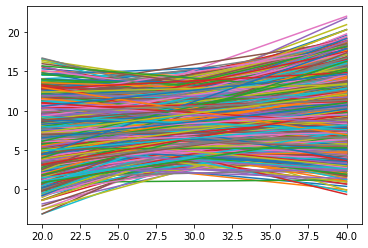

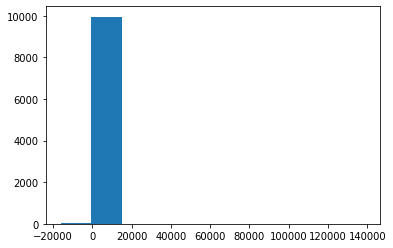

In [18]:
x = [20, 40]
y = [6.544791838, 10.68824607]
err = [2.542278392, 2.963180401]
thresh = 10

plt.errorbar(x, y, yerr=err/np.sqrt(30))
inters = []
iters = 10000
for i in range(iters):
    y1 = np.random.normal(y[0], err[0])
    y2 = np.random.normal(y[1], err[1])
    inter = get_intercept(x[0], x[1], y1, y2, thresh)
    inters.append(inter)
    plt.plot(x, [y1, y2])

plt.figure()
plt.hist(inters)

print(np.mean(inters))
print(np.std(inters)/np.sqrt(iters))

(array([ 12.,  38., 112., 180., 218., 206., 146.,  60.,  24.,   4.]),
 array([-0.47115982,  1.02855894,  2.5282777 ,  4.02799645,  5.52771521,
         7.02743397,  8.52715272, 10.02687148, 11.52659023, 13.02630899,
        14.52602775]),
 <BarContainer object of 10 artists>)

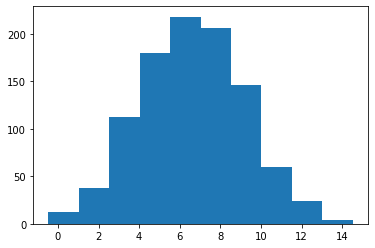

In [7]:
vals = np.random.normal(y[0], err[0], 1000)
plt.hist(vals)

In [19]:
np.polyfit([0, 1, 2], [1.5, 4, 8.3], deg=1)

array([3.4, 1.2])

In [ ]:
2*3